# Fourier Transforms

Fourier transforms convert from periodic functions (in our case, periodic in time or space) to a Fourier series of orthogonal sine and cosine functions:

\begin{equation*}
a(t) = \frac{1}{2}a_0 + \sum_{n=1}^{\infty}(c_n cos(n{\omega}t) + s_n sin(n{\omega}t))
\end{equation*}

When s<sub>n</sub> sin c<sub>n</sub> are Fourier coefficients.

In seismology we use the Fourier transform to convert from the time domain to the frequency domain. Because we are dealing with digital data (discretely 
sampled) we make use of the discrete Fourier transform (DFT). We will often refer to the Fast Fourier transform (FFT) as well, which is an efficient computational
implementation of the DFT. The Fourier transform allows us to study the frequencies that make up our seismogram - we will make use of this when computing
magnitudes and thinking about earthquake source processes.  Over longer time-series we can also look at the the frequencies of various normal modes of the earth.

One of the most common uses for the Fourier transform in seismology is when filtering seismograms.  Filters work as convolutions in the time domain, or
multiplications in the frequency domain.  Because multiplication is more computationally efficient than convolution, filtering is commonly done in the
frequency domain.  Of key importance here is that we can convert back from the frequency domain to the time domain using the inverse Fourier transform
(IFT).

In this notebook we will look at the Fourier spectrums of a few different signals - we will also play with decimating our data in the same way that we did in
the [digitizers notebook](2_Digitizers.ipynb).

Notes:

- [ ] Include need for periodicity - function must start and end at the same value to allow wraparound - detrending!

In [1]:
# Set up notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from obspy import read


def plot_fft(x, y, dt):
    """
    Calculate the FFT of a discretely sampled series and plot the spectra.
    
    :type y: `numpy.ndarray`
    :param y: Series to calculate FFT for.
    :type dt: float
    :param dt: 
        Sample interval - assumed to be in seconds, so frequencies in Hz.
    """
    from scipy import fftpack
    
    N = len(y)
    fft_len = fftpack.next_fast_len(N)  # Find the next fast length for the FFT
    yf = fftpack.fft(y, n=fft_len)
    xf = np.linspace(0.0, 1.0 / (2. * dt), N / 2)
    yr = fftpack.ifft(yf)
    
    fig, ax = plt.subplots(nrows=3, figsize=(15, 8))
    ax[0].plot(x, y, label="Time series")
    ax[0].set_xlabel("Time (s)")
    ax[0].autoscale(enable=True, axis='both', tight=True)
    ax[0].legend()
    
    ax[1].loglog(xf, 2./N * np.abs(yf[:N//2]), label="Frequency spectra")
    ax[1].set_xlabel("Frequency (Hz)")
    ax[1].autoscale(enable=True, axis='both', tight=True)
    ax[1].legend()
    
    ax[2].plot(x, yr, label="Reconstructed Time-series")
    ax[2].set_xlabel("Time (s)")
    ax[2].autoscale(enable=True, axis='both', tight=True)
    ax[2].legend()

/home/calumch/miniconda3/envs/conda_36/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/calumch/miniconda3/envs/conda_36/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


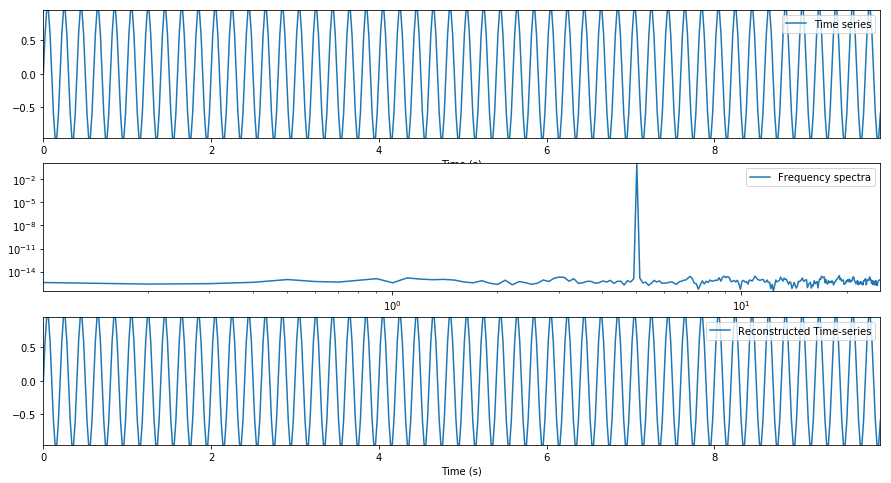

In [2]:
sample_frequency = 50
dt = 1 / sample_frequency
sine_freq = 5
x = np.arange(0.0, 50 * (1 / sine_freq), dt)
y = np.sin(x * sine_freq * 2 * np.pi)

plot_fft(x, y, dt)

With this simple sine curve we get a nice clear peak in the frequency spectra at the frequency of the input sine curve.

Lets try adding in a second, higher frequency since curve and see what that looks like.

/home/calumch/miniconda3/envs/conda_36/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/calumch/miniconda3/envs/conda_36/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


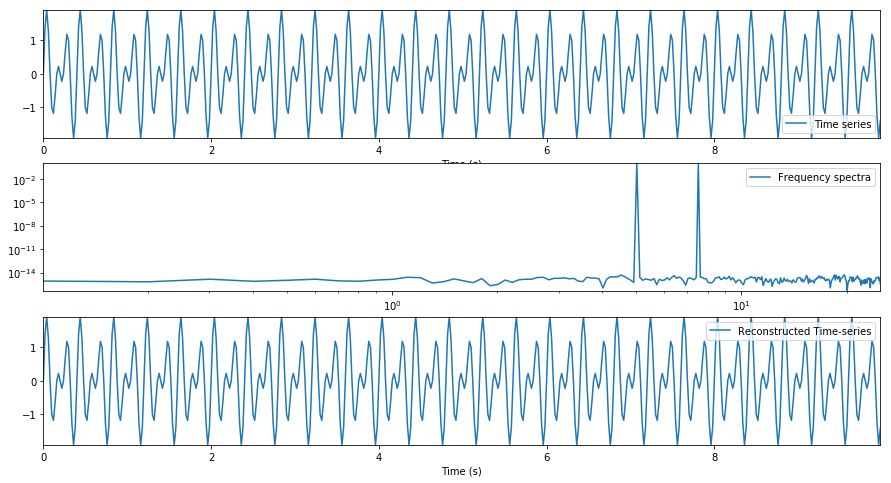

In [3]:
second_sine_freq = 7.5
y += np.sin(x * second_sine_freq * 2 * np.pi)

plot_fft(x, y, dt)

Now lets try some real data.

/home/calumch/miniconda3/envs/conda_36/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/calumch/miniconda3/envs/conda_36/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


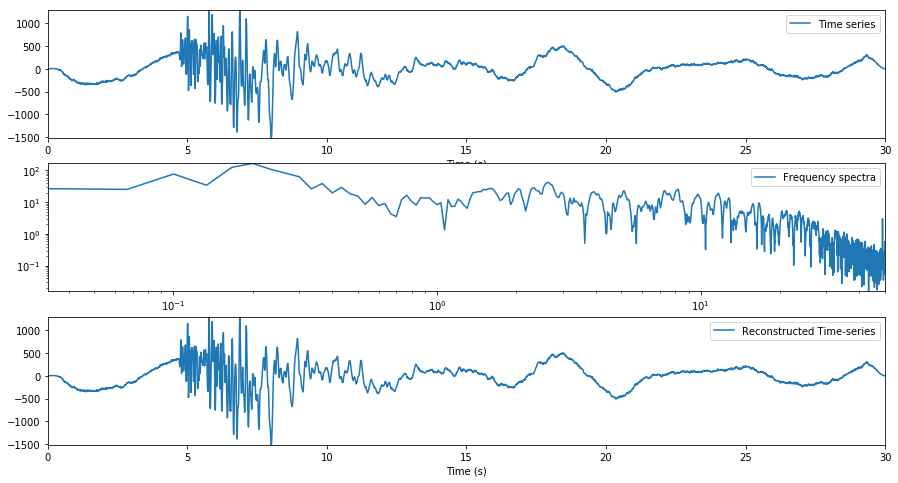

In [4]:
tr = read()[0]
x = np.arange(0, tr.stats.npts * tr.stats.delta, tr.stats.delta)
y = tr.data

plot_fft(x, y, tr.stats.delta)

What is the dominant frequency here?

You can see it in the raw data - this background low-frequency energy is often related to the Earth's noise microseisms. 
Also note that the amplitude of the frequency spectra falls off this increasing frequency. We will use this later to
estimate moment magnitude.

Lets see what our spectra looks like when we decimate our seismic data.

/home/calumch/miniconda3/envs/conda_36/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/calumch/miniconda3/envs/conda_36/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


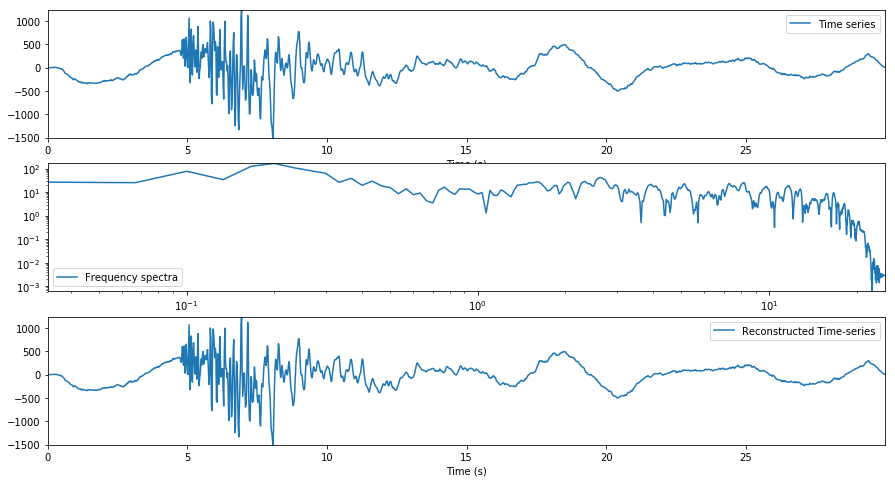

In [5]:
tr.decimate(2)

x = np.arange(0, tr.stats.npts * tr.stats.delta, tr.stats.delta)
y = tr.data

plot_fft(x, y, tr.stats.delta)

Play around with other sine-waves, and decimation factors.  What do you see happening to the spectra of the decimated seismogram?

In the [next notebook](4_Filtering_Resampling.ipynb) we will look at how we filter seismic data and what effect this has on the sepctra.